#### Machine Learning Mini Project
Aatreyi Dutt 24070243059\
March 2025

#### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Fetch data and set column names (source url: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

In [2]:
df = pd.read_csv("magic04.csv", names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])

In [6]:
df.sample(7)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
13396,75.4110,16.1061,2.7819,0.4082,0.2108,70.0166,16.1647,-9.8261,17.3643,56.1356,h
13693,22.2454,12.4406,2.6138,0.5280,0.2981,4.9286,11.7127,-10.4876,47.5827,226.5280,h
5093,58.3845,22.0406,3.2777,0.2422,0.1237,17.7287,63.6753,-9.4804,8.6072,254.7750,g
8116,21.7358,10.5355,2.2695,0.5753,0.2930,17.5263,16.8871,-4.7663,41.1555,80.2342,g
3434,39.6591,20.9084,3.0147,0.3122,0.1677,22.5436,40.8734,-12.9150,3.7613,160.2780,g
4576,19.0999,7.4626,2.1746,0.7492,0.4582,-1.2309,6.4139,4.0277,34.8410,123.3920,g
3280,41.1201,32.9111,3.3970,0.1571,0.0792,-18.0977,24.4557,-13.9225,84.7514,131.1820,g


Check data types of each column

In [7]:
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

Attribute information (from UCI ML repository):

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
	10. fDist:    continuous  # distance from origin to center of ellipse [mm]
   	11. class:    g,h         # gamma (signal), hadron (background)

Our target variable will be $class$, where we will use the particle's properties to determine if it is a gamma or hadron particle.\
As such, the ML model will be a classification model, for example a decision tree.

Check initial size of dataframe in terms of (rows, columns)

In [8]:
df.shape

(19020, 11)

Remove duplicates

In [3]:
duplicates = df[df.duplicated()]
duplicates

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12827,202.8290,73.9967,4.3622,0.0678,0.0364,-66.4079,-159.3540,-21.2584,76.1130,348.9780,h
13332,30.1721,16.8838,2.6902,0.4673,0.2704,8.8759,25.3694,14.0300,74.7090,229.2960,h
13486,69.7676,18.9821,2.7478,0.5255,0.2654,-44.5832,-30.7591,-12.9547,33.0052,303.9140,h
14150,130.3080,13.3030,2.6021,0.3250,0.1812,-204.5730,116.0500,4.7837,49.7590,173.5520,h
14160,16.9894,11.0002,2.4564,0.6294,0.3514,-3.4902,8.0823,-7.0516,55.3930,91.3761,h
...,...,...,...,...,...,...,...,...,...,...,...
18809,60.5328,34.9208,3.0436,0.2732,0.1750,-39.5703,45.4899,-28.7449,0.8124,290.6000,h
18826,38.7641,20.0218,2.6279,0.2921,0.1543,-49.9354,-21.7010,-13.0915,19.7802,136.9650,h
18831,22.2134,18.3853,2.5653,0.4354,0.2599,-16.5600,16.1254,13.1403,23.6480,93.1750,h
18929,19.8489,12.8985,2.3847,0.5567,0.3155,-12.1732,-10.7301,7.9112,55.0925,168.9720,h


In [4]:
df = df.drop_duplicates()

Check statistics of numerical columns

In [5]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


$fWidth$ (mm) cannot be 0, remove rows where this is the case

In [6]:
df = df[(df['fWidth'] != 0)]

Check updated statistics

In [13]:
df.shape

(18807, 11)

In [14]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000
mean,53.312913,22.261270,2.827959,0.378383,0.213505,-4.217234,10.663454,0.264547,27.488807,193.880301
std,42.316925,18.278143,0.471279,0.181299,0.109613,59.151156,51.023341,20.821183,26.059142,74.742526
min,4.283500,0.000100,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.437000,11.946800,2.480000,0.235100,0.128000,-20.570900,-12.861400,-10.856200,5.491000,142.506500
50%,37.289500,17.213000,2.742700,0.352600,0.195600,4.132800,15.425300,1.284200,17.483000,192.034000
75%,70.199450,24.765550,3.104050,0.501050,0.283300,24.151750,36.054200,10.973100,45.554600,240.736550
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


Distribution of target variable $class$

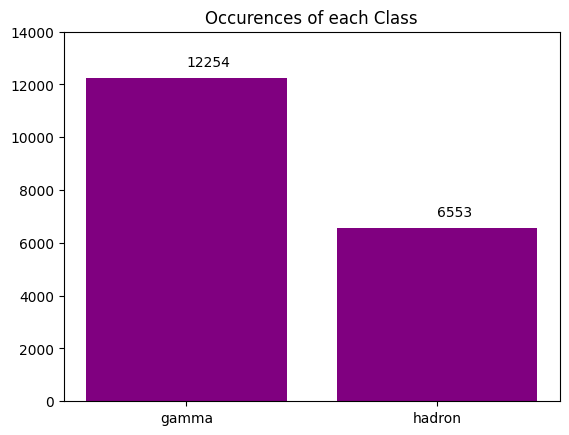

In [15]:
counts = df['class'].value_counts()
x = ['gamma','hadron']
y = [counts['g'],counts['h']]
plt.bar(x,y,color='purple')
plt.title('Occurences of each Class')
plt.ylim(0,14000)
plt.text(0,12700, counts['g'])
plt.text(1,7000, counts['h'])
plt.show()

There are almost double the occurences of gamma particles in the dataset compared to hadron particles. The ML classification model trained on this data may then be better suited to classify gamma particles as compared to hardon since it has more gamma training data. 

Distribution of features, grouped by $class$

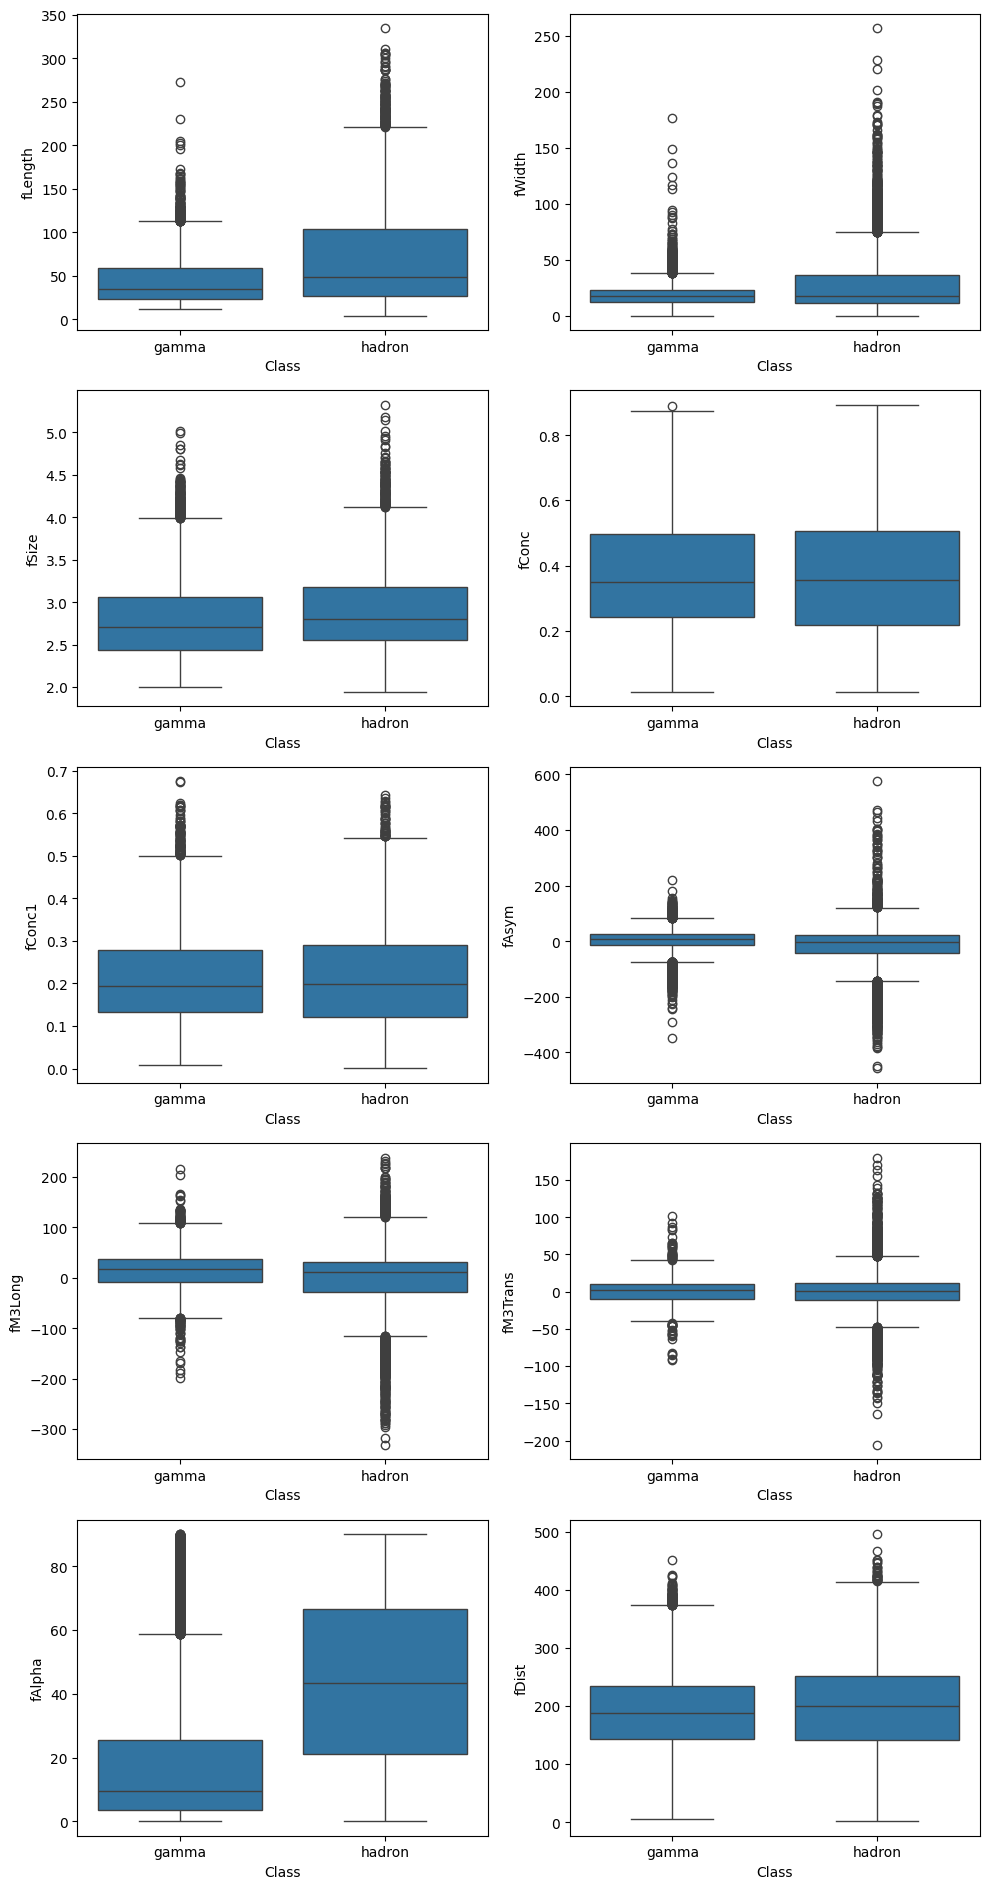

In [8]:
features = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']

fig, axes = plt.subplots(5, 2, figsize=(10,20))

df['class'] = df['class'].replace(['g','h'],['gamma','hadron'])

axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x=df['class'], y=df[col], ax=axes[i])
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(col)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Correlation

C:\Users\HOME\AppData\Local\Temp\ipykernel_6648\3762550249.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(['gamma','hadron'],[0,1])


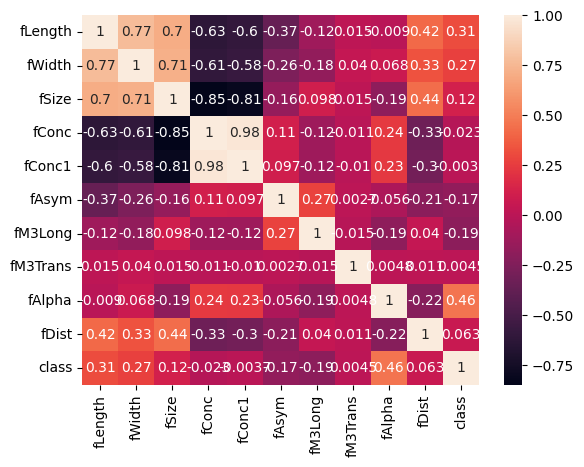

In [9]:
# encoding gamma as 0, hadron as 1
df['class'] = df['class'].replace(['gamma','hadron'],[0,1])

sns.heatmap(df.corr(),annot=True)
plt.show()

$fConc$ and $fConc1$ have a correlation of 0.98 and are very similar features. One of them should be removed:

In [10]:
df = df.drop(['fConc1'], axis=1)

From the correlation map, we see that our target variable $class$ is positively correlated to $fAlpha$ (0.46) and $fLength$ (0.31), making them possible features for a classification model.\
The two features are also independent of each other, with a correlation of 0.009. With no intercorrelation, these might make for useful features for particle classification in our model

#### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Prepare features and target variable

In [12]:
x = df.drop(columns=['class'], axis=1)
y = df['class']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=7)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Logistic Regression

Create logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = logreg.predict(x_test)

Performance metrics

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

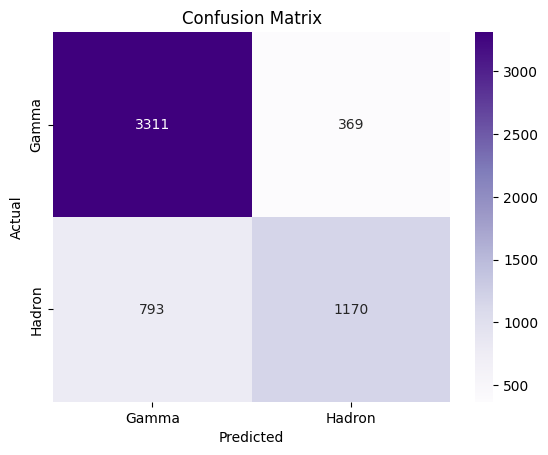

In [19]:
conf = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
sns.heatmap(conf, annot=True, fmt='d', cmap='Purples', xticklabels=['Gamma', 'Hadron'], yticklabels=['Gamma', 'Hadron'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision  = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("f1 score: {:.2f}%".format(f1 * 100))

Accuracy: 79.41%
Precision: 76.02%
Recall: 59.60%
f1 score: 66.82%


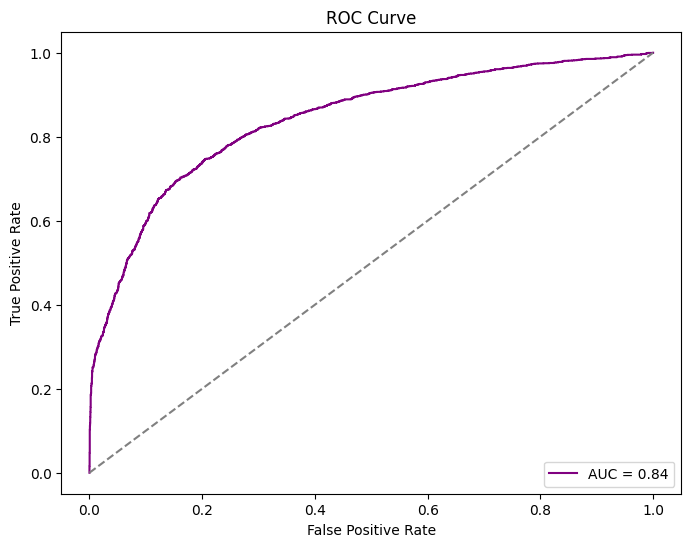

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Predict probabilities for the positive class (e.g., class 1)
y_scores = logreg.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="purple", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

##### K Nearest Neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=15, p=2,metric='euclidean')

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [25]:
y_pred = knn.predict(x_test)

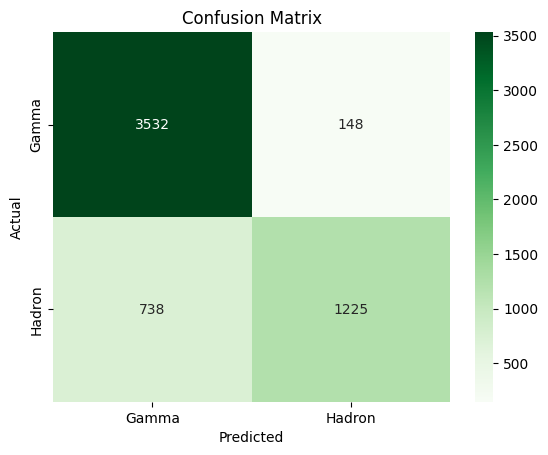

In [26]:
conf = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
sns.heatmap(conf, annot=True, fmt='d', cmap='Greens', xticklabels=['Gamma', 'Hadron'], yticklabels=['Gamma', 'Hadron'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision  = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("f1 score: {:.2f}%".format(f1 * 100))

Accuracy: 84.30%
Precision: 89.22%
Recall: 62.40%
f1 score: 73.44%


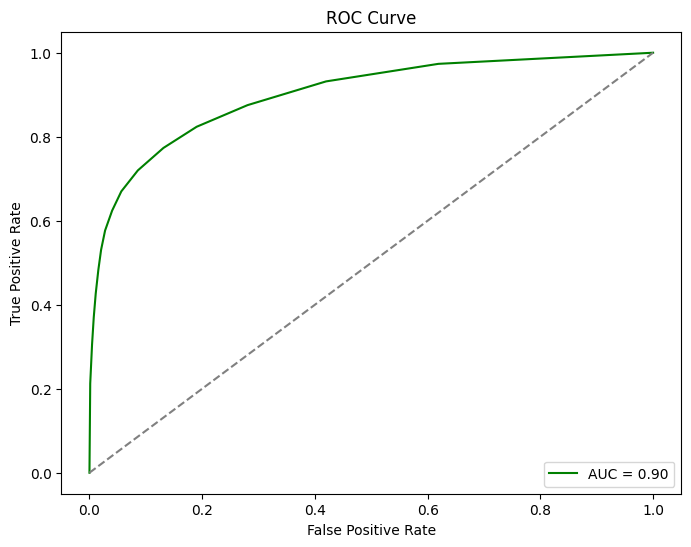

In [28]:
# Predict probabilities for the positive class (e.g., class 1)
y_scores = knn.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="green", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

##### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=50)

In [61]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [62]:
y_pred = rf.predict(x_test)

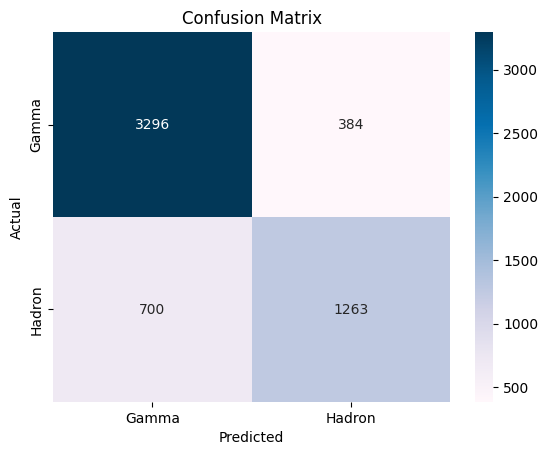

In [63]:
conf = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
sns.heatmap(conf, annot=True, fmt='d', cmap='PuBu', xticklabels=['Gamma', 'Hadron'], yticklabels=['Gamma', 'Hadron'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision  = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("f1 score: {:.2f}%".format(f1 * 100))

Accuracy: 80.79%
Precision: 76.68%
Recall: 64.34%
f1 score: 69.97%


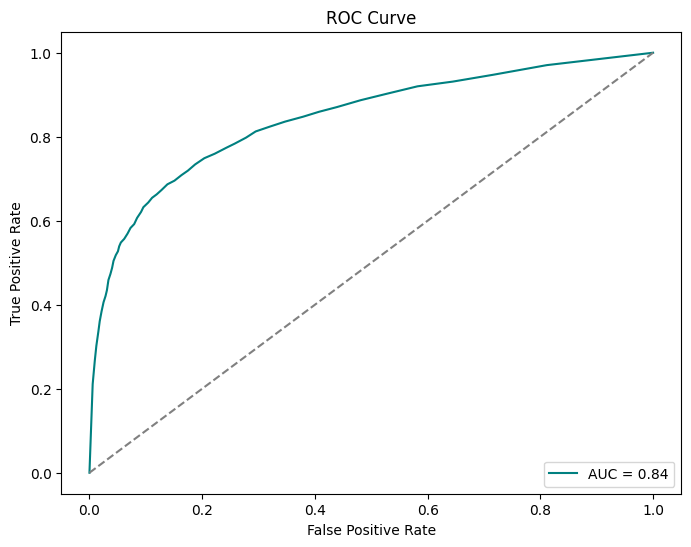

In [66]:
# Predict probabilities for the positive class (e.g., class 1)
y_scores = rf.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="teal", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

##### XGBoost

In [57]:
import xgboost

In [58]:
xgb = xgboost.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=7
)

In [69]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
y_pred = xgb.predict(x_test)

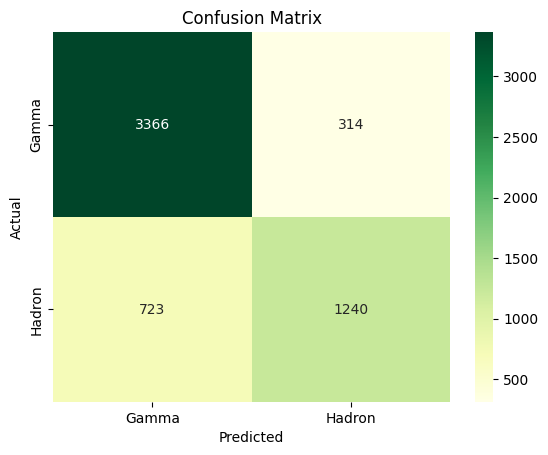

In [71]:
conf = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
sns.heatmap(conf, annot=True, fmt='d', cmap='YlGn', xticklabels=['Gamma', 'Hadron'], yticklabels=['Gamma', 'Hadron'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

precision  = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("f1 score: {:.2f}%".format(f1 * 100))

Accuracy: 81.62%
Precision: 79.79%
Recall: 63.17%
f1 score: 70.51%


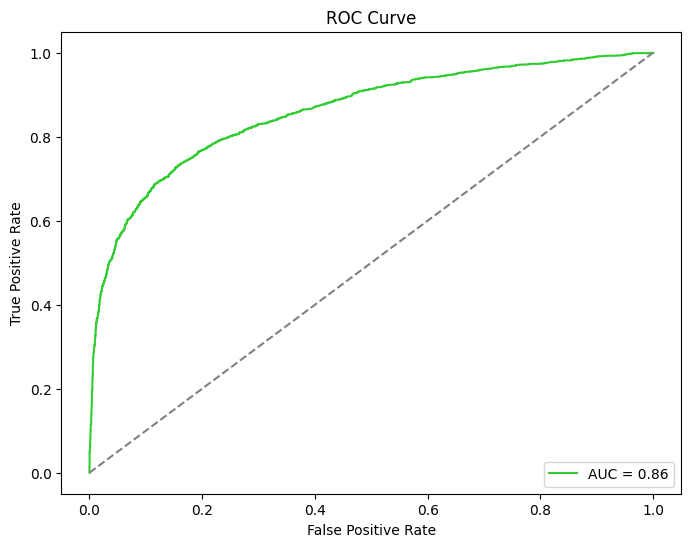

In [73]:
# Predict probabilities for the positive class (e.g., class 1)
y_scores = xgb.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="limegreen", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()